<a href="https://colab.research.google.com/github/zrsteff/CSC587/blob/main/PD_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PD Project

# Data Import and Cleaning

In [ ]:
import pandas as pd
import requests

excel_url = "https://github.com/zrsteff/CSC587-PD-Project/raw/main/FORD-0101-21ML%2B%20DATA%20TABLES_SERUM%20(METADATA%20UPDATE)%20-%205.XLSX"
response = requests.get(excel_url)
response.raise_for_status() # Raise an exception for bad status codes
with open("data.xlsx", "wb") as f:
    f.write(response.content)
excel_file = pd.ExcelFile("data.xlsx")
sheet_names = excel_file.sheet_names
dfs = {}
for sheet_name in sheet_names:
    dfs[sheet_name] = excel_file.parse(sheet_name)
print("Sheets read from the Excel file:")
for sheet_name in sheet_names:
    print(f"- {sheet_name}")

Sheets read from the Excel file:
- Data Key & Explanation
- Chemical Annotation
- Sample Meta Data
- Peak Area Data
- Batch-normalized Data
- Batch-norm Imputed Data
- Log Transformed Data


In [ ]:
log_transformed_df = dfs['Log Transformed Data']
sample_meta_df = dfs['Sample Meta Data']
display(log_transformed_df.head())
display(sample_meta_df.head())

,PARENT_SAMPLE_NAME,35,50,55,62,71,93,98,111,112,...,999925983,999926058,999926062,999926097,999926106,999926107,999926108,999926109,999926111,999926119
0,FORD-01864,-0.790719,0.344457,0.008497,-0.971181,-0.708996,-0.123428,-0.167763,-0.096042,-0.846930,...,-0.024880,-0.439039,-2.025472,0.192280,-0.280976,-0.127144,0.115100,-0.713093,-1.116885,-0.489662
1,FORD-01865,-0.799712,0.253333,0.397977,-0.555479,-0.384482,-0.208101,0.120475,0.358184,-0.405095,...,-0.289235,-0.473777,-0.919825,0.235952,0.592063,0.447245,0.491327,0.190616,1.253088,0.208067
2,FORD-01866,0.763389,-0.173630,-1.701158,-1.339214,-0.005321,0.316844,-0.441145,-0.127984,1.111707,...,0.589681,0.387844,5.468136,0.025616,-1.124077,-0.875705,-0.431326,0.542659,-0.588468,-0.739856
3,FORD-01867,0.731768,-0.798850,-1.137471,0.383820,0.587303,0.223999,-0.180993,0.188229,0.281230,...,0.514556,0.075265,0.000000,-0.333566,-0.111533,0.034530,-0.088870,0.197221,0.103648,-0.719921
4,FORD-01868,0.292937,0.260915,0.099700,1.410015,0.028393,0.600868,0.263158,0.091365,1.396008,...,0.033282,-1.407253,0.045656,-0.531562,-0.168789,0.221036,0.058911,0.113740,0.151346,-0.587543


,PARENT_SAMPLE_NAME,CLIENT_IDENTIFIER,NEG,POLAR,POS EARLY,POS LATE,ALT_MRN_DONT_REPORT_BL_1,BOX_NUMBER,CLIENT_MATRIX,CLIENT_SAMPLE_NUMBER,...,PPMI_TYPE,RUN_NUMBER,RUN_POSITION,SAMPLE_AMOUNT,SAMPLE_AMOUNT_UNITS,SAMPLE_BOX_LOCATION,SAMPLE_DESCRIPTION,SOURCE,SPECIMEN_NO_DONT_REPOR_1,TURBIDITY_GRADE
0,FORD-01864,0005822956,226490,227078,226492,226496,50074,32382_Serum1,Serum,2,...,NOT_APPLICABLE,1,2,200,ul,2,32382_LeWitt_PPMI and DATATOP,DATATOP,1354207.3,0-Clear
1,FORD-01865,0005771110,226490,227078,226492,226496,50693,32382_Serum1,Serum,11,...,NOT_APPLICABLE,1,11,200,ul,11,32382_LeWitt_PPMI and DATATOP,DATATOP,1468402.2,0-Clear
2,FORD-01866,0004365978,226490,227078,226492,226496,ST-00007050,32382_Serum1,Serum,25,...,Serum,1,25,200,ul,25,32382_LeWitt_PPMI and DATATOP,PPMI,334391.7,0-Clear
3,FORD-01867,PP0008-3392,226490,227078,226492,226496,ST-00007050,32382_Serum1,Serum,26,...,Serum,1,26,200,ul,26,32382_LeWitt_PPMI and DATATOP,PPMI,338891.2,NaN
4,FORD-01868,PP0018-0769,226490,227078,226492,226496,ST-00016198,32382_Serum1,Serum,28,...,Serum,1,28,200,ul,28,32382_LeWitt_PPMI and DATATOP,PPMI,363270.5,0-Clear


In [ ]:
numeric_cols = log_transformed_df.select_dtypes(include=['number']).columns.tolist()
if 'PARENT_SAMPLE_NAME' in numeric_cols:
    numeric_cols.remove('PARENT_SAMPLE_NAME')


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

normalized_data = scaler.fit_transform(log_transformed_df[numeric_cols])

log_transformed_normalized_df = pd.DataFrame(normalized_data, columns=numeric_cols)

display(log_transformed_normalized_df.head())

,35,50,55,62,71,93,98,111,112,117,...,999925983,999926058,999926062,999926097,999926106,999926107,999926108,999926109,999926111,999926119
0,0.394993,0.695684,0.315211,0.113092,0.248824,0.516787,0.469783,0.388031,0.247995,0.060950,...,0.161746,0.195427,0.000000,0.289506,0.437040,0.453627,0.400372,0.347290,0.299344,0.312996
1,0.392726,0.663317,0.387020,0.227268,0.353561,0.488543,0.568894,0.607315,0.396132,0.119743,...,0.123830,0.188415,0.147545,0.301173,0.775182,0.652593,0.547446,0.581187,0.689146,0.541752
2,0.786719,0.511660,0.000000,0.012009,0.475935,0.663647,0.375781,0.372611,0.904681,0.168425,...,0.249889,0.362328,1.000000,0.244981,0.110494,0.194328,0.186765,0.672302,0.386255,0.230968
3,0.778748,0.289583,0.103928,0.485253,0.667204,0.632677,0.465235,0.525267,0.626241,0.155348,...,0.239115,0.299236,0.270293,0.149025,0.502668,0.509630,0.320637,0.582896,0.500091,0.237503
4,0.668137,0.666010,0.332027,0.767105,0.486816,0.758387,0.617956,0.478504,1.000000,0.145565,...,0.170087,0.000000,0.276386,0.096130,0.480492,0.574235,0.378407,0.561290,0.507937,0.280905


In [ ]:
log_transformed_normalized_with_id_df = pd.concat([log_transformed_df[['PARENT_SAMPLE_NAME']], log_transformed_normalized_df], axis=1)

display(log_transformed_normalized_with_id_df.head())

,PARENT_SAMPLE_NAME,35,50,55,62,71,93,98,111,112,...,999925983,999926058,999926062,999926097,999926106,999926107,999926108,999926109,999926111,999926119
0,FORD-01864,0.394993,0.695684,0.315211,0.113092,0.248824,0.516787,0.469783,0.388031,0.247995,...,0.161746,0.195427,0.000000,0.289506,0.437040,0.453627,0.400372,0.347290,0.299344,0.312996
1,FORD-01865,0.392726,0.663317,0.387020,0.227268,0.353561,0.488543,0.568894,0.607315,0.396132,...,0.123830,0.188415,0.147545,0.301173,0.775182,0.652593,0.547446,0.581187,0.689146,0.541752
2,FORD-01866,0.786719,0.511660,0.000000,0.012009,0.475935,0.663647,0.375781,0.372611,0.904681,...,0.249889,0.362328,1.000000,0.244981,0.110494,0.194328,0.186765,0.672302,0.386255,0.230968
3,FORD-01867,0.778748,0.289583,0.103928,0.485253,0.667204,0.632677,0.465235,0.525267,0.626241,...,0.239115,0.299236,0.270293,0.149025,0.502668,0.509630,0.320637,0.582896,0.500091,0.237503
4,FORD-01868,0.668137,0.666010,0.332027,0.767105,0.486816,0.758387,0.617956,0.478504,1.000000,...,0.170087,0.000000,0.276386,0.096130,0.480492,0.574235,0.378407,0.561290,0.507937,0.280905


In [ ]:
sample_meta_subset_df = sample_meta_df[['PARENT_SAMPLE_NAME', 'PPMI_CLINICAL_EVENT','PPMI_COHORT', 'COHORT']]

display(sample_meta_subset_df.head())

,PARENT_SAMPLE_NAME,PPMI_CLINICAL_EVENT,PPMI_COHORT,COHORT
0,FORD-01864,NOT_APPLICABLE,NOT_APPLICABLE,DAT-02-124-21
1,FORD-01865,NOT_APPLICABLE,NOT_APPLICABLE,DAT-17-154-13
2,FORD-01866,V06,Control,PPMI
3,FORD-01867,BL,Control,PPMI
4,FORD-01868,BL,PD,PPMI


In [ ]:
# Merge the normalized log transformed data with the sample meta data subset
merged_df = pd.merge(log_transformed_normalized_with_id_df, sample_meta_subset_df, on='PARENT_SAMPLE_NAME', how='left')
merged_df_filtered = merged_df[(merged_df['COHORT'] == 'PPMI') & (merged_df['PPMI_CLINICAL_EVENT'] == 'BL')]
display(merged_df_filtered.head())

,PARENT_SAMPLE_NAME,35,50,55,62,71,93,98,111,112,...,999926097,999926106,999926107,999926108,999926109,999926111,999926119,PPMI_CLINICAL_EVENT,PPMI_COHORT,COHORT
3,FORD-01867,0.778748,0.289583,0.103928,0.485253,0.667204,0.632677,0.465235,0.525267,0.626241,...,0.149025,0.502668,0.509630,0.320637,0.582896,0.500091,0.237503,BL,Control,PPMI
4,FORD-01868,0.668137,0.666010,0.332027,0.767105,0.486816,0.758387,0.617956,0.478504,1.000000,...,0.096130,0.480492,0.574235,0.378407,0.561290,0.507937,0.280905,BL,PD,PPMI
8,FORD-01872,0.656403,0.685158,0.373586,0.636677,0.293891,0.683221,0.564474,0.598420,0.729360,...,0.116745,0.578821,0.494090,0.230620,0.134770,0.270941,0.497682,BL,Control,PPMI
21,FORD-01885,0.478529,0.473766,0.413583,0.179782,0.367953,0.599307,0.394319,0.587325,0.640601,...,0.077277,0.553584,0.497669,0.299108,0.000000,0.731075,0.587024,BL,Control,PPMI
22,FORD-01886,0.785350,0.427819,0.336515,0.882540,0.971881,0.343169,0.286905,0.038537,0.652570,...,0.030175,0.100276,0.229316,0.000000,0.309579,0.302816,0.537140,BL,PD,PPMI


In [ ]:
display(merged_df_filtered.describe())

,35,50,55,62,71,93,98,111,112,117,...,999925983,999926058,999926062,999926097,999926106,999926107,999926108,999926109,999926111,999926119
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,...,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,0.647019,0.490632,0.340929,0.465813,0.505199,0.595669,0.518213,0.496555,0.617541,0.149810,...,0.142679,0.234316,0.125605,0.182326,0.515501,0.512236,0.300294,0.516977,0.516132,0.428675
std,0.102202,0.229722,0.152124,0.205766,0.156837,0.103203,0.118468,0.192541,0.134664,0.143612,...,0.147333,0.161430,0.195493,0.066350,0.193730,0.140703,0.193854,0.201852,0.181394,0.180865
min,0.436402,0.000000,0.093440,0.039021,0.000000,0.187204,0.253241,0.038537,0.380543,0.000000,...,0.000000,0.000000,0.000000,0.030175,0.000000,0.229316,0.000000,0.000000,0.040619,0.000000
25%,0.572054,0.348438,0.243115,0.328388,0.419633,0.548749,0.450866,0.361965,0.526139,0.079167,...,0.000000,0.109051,0.000000,0.133699,0.403758,0.415059,0.162029,0.405857,0.381188,0.298007
50%,0.649394,0.538268,0.332026,0.459583,0.488249,0.595872,0.530163,0.490175,0.616950,0.129517,...,0.159540,0.262083,0.000000,0.188741,0.546894,0.501354,0.299808,0.524158,0.525232,0.421428
75%,0.721432,0.660817,0.399234,0.630451,0.564763,0.654079,0.594743,0.634758,0.680783,0.179990,...,0.224430,0.340171,0.239389,0.236233,0.657016,0.587176,0.401018,0.634744,0.641696,0.534965
max,0.915113,0.910754,1.000000,1.000000,0.971881,0.852849,0.761496,1.000000,1.000000,0.988480,...,0.996097,0.643968,0.828115,0.341256,0.929887,1.000000,1.000000,0.904398,1.000000,0.999698


In [ ]:
missing_values_count = merged_df_filtered.isnull().sum()

print("Columns with missing values and their counts:")
print(missing_values_count[missing_values_count > 0])

numeric_cols_filtered = merged_df_filtered.select_dtypes(include=['number']).columns.tolist()

median_values = merged_df_filtered[numeric_cols_filtered].median()

merged_df_filtered = merged_df_filtered.copy()
merged_df_filtered[numeric_cols_filtered] = merged_df_filtered[numeric_cols_filtered].fillna(median_values)

print("\nMissing values after imputation:")
print(merged_df_filtered[numeric_cols_filtered].isnull().sum().sum())

Columns with missing values and their counts:
Series([], dtype: int64)

Missing values after imputation:
0


In [ ]:
features_df = merged_df_filtered.drop(columns=['PARENT_SAMPLE_NAME', 'PPMI_COHORT', 'COHORT', 'PPMI_CLINICAL_EVENT'])

target_series = merged_df_filtered['PPMI_COHORT']

## Principal Component Analysis (PCA) and Machine Learning Modeling

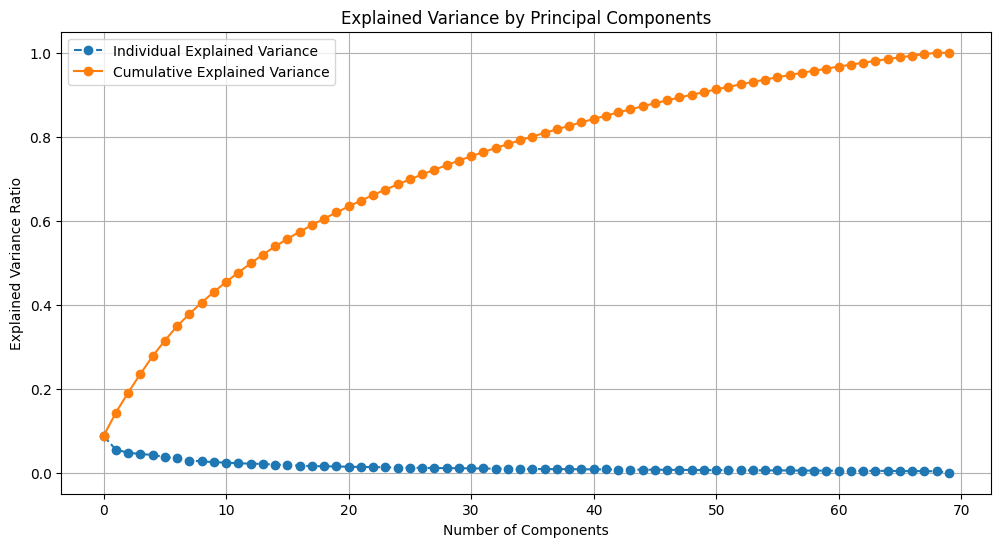

Explained variance ratio for the first 10 components:
Principal Component 1: 0.0876
Principal Component 2: 0.0551
Principal Component 3: 0.0477
Principal Component 4: 0.0446
Principal Component 5: 0.0423
Principal Component 6: 0.0373
Principal Component 7: 0.0344
Principal Component 8: 0.0289
Principal Component 9: 0.0272
Principal Component 10: 0.0251

Cumulative explained variance for the first 10 components:
Up to Principal Component 1: 0.0876
Up to Principal Component 2: 0.1427
Up to Principal Component 3: 0.1904
Up to Principal Component 4: 0.2350
Up to Principal Component 5: 0.2773
Up to Principal Component 6: 0.3146
Up to Principal Component 7: 0.3490
Up to Principal Component 8: 0.3779
Up to Principal Component 9: 0.4051
Up to Principal Component 10: 0.4302


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA()

pca.fit(features_df)

explained_variance_ratio = pca.explained_variance_ratio_

cumulative_explained_variance = explained_variance_ratio.cumsum()

plt.figure(figsize=(12, 6))
plt.plot(explained_variance_ratio, marker='o', linestyle='--', label='Individual Explained Variance')
plt.plot(cumulative_explained_variance, marker='o', linestyle='-', label='Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.legend()
plt.show()

# Display the explained variance ratio for the first few components (e.g., top 10)
print("Explained variance ratio for the first 10 components:")
for i, ratio in enumerate(explained_variance_ratio[:10]):
    print(f"Principal Component {i+1}: {ratio:.4f}")

# Display the cumulative explained variance for the first few components
print("\nCumulative explained variance for the first 10 components:")
for i, cumulative_ratio in enumerate(cumulative_explained_variance[:10]):
    print(f"Up to Principal Component {i+1}: {cumulative_ratio:.4f}")

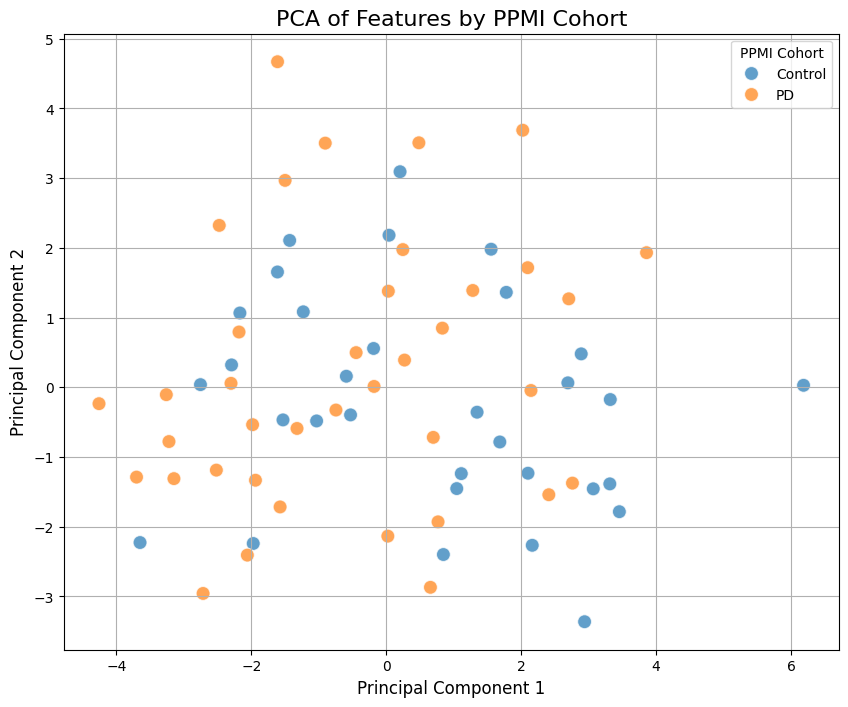

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

pca_components = pca.transform(features_df)
pca_df = pd.DataFrame(data=pca_components[:, 0:2], columns=['PC1', 'PC2'])
target_series_reset_index = target_series.reset_index(drop=True)
pca_df = pd.concat([pca_df, target_series_reset_index], axis=1)
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='PPMI_COHORT', data=pca_df, s=100, alpha=0.7)
plt.title('PCA of Features by PPMI Cohort', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='PPMI Cohort')
plt.grid(True)

plt.show()

## Identify Top 20 Predictive Features

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
import numpy as np

constant_columns = features_df.columns[features_df.std(axis=0) < 1e-9]

features_df_filtered = features_df.drop(columns=constant_columns)

selector = SelectKBest(score_func=f_classif, k=20)

selector.fit(features_df_filtered, target_series)

selected_features_mask = selector.get_support()

top_20_features = features_df_filtered.columns[selected_features_mask].tolist()

print("Top 20 predictive features (after removing constant features):")
print(top_20_features)

Top 20 predictive features (after removing constant features):
[100000463, 100001145, 100001398, 100001613, 100001614, 100001615, 100001733, 100002070, 100003470, 100004326, 100005996, 100019975, 100019978, 100021100, 100021208, 100021726, 999917612, 999921830, 999921834, 999924549]


## Prepare Datasets for Modeling

In [ ]:
from sklearn.model_selection import train_test_split

features_df_top20 = features_df_filtered[top_20_features]

random_seed = 42

X_full_train, X_full_test, y_full_train, y_full_test = train_test_split(
    features_df_filtered, target_series, test_size=0.2, random_state=random_seed, stratify=target_series
)

X_top20_train, X_top20_test, y_top20_train, y_top20_test = train_test_split(
    features_df_top20, target_series, test_size=0.2, random_state=random_seed, stratify=target_series
)

print("Shapes of the full feature set splits:")
print(f"X_full_train shape: {X_full_train.shape}")
print(f"X_full_test shape: {X_full_test.shape}")
print(f"y_full_train shape: {y_full_train.shape}")
print(f"y_full_test shape: {y_full_test.shape}")

print("\nShapes of the top 20 feature set splits:")
print(f"X_top20_train shape: {X_top20_train.shape}")
print(f"X_top20_test shape: {X_top20_test.shape}")
print(f"y_top20_train shape: {y_top20_train.shape}")
print(f"y_top20_test shape: {y_top20_test.shape}")

Shapes of the full feature set splits:
X_full_train shape: (56, 1440)
X_full_test shape: (14, 1440)
y_full_train shape: (56,)
y_full_test shape: (14,)

Shapes of the top 20 feature set splits:
X_top20_train shape: (56, 20)
X_top20_test shape: (14, 20)
y_top20_train shape: (56,)
y_top20_test shape: (14,)


## Train and Evaluate Models (Full Dataset)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

full_dataset_models = {}
full_dataset_metrics = {}

models = {
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gaussian Naive Bayes': GaussianNB(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(random_state=42)
}

for name, model in models.items():
    print(f"\nTraining and evaluating {name}...")

    model.fit(X_full_train, y_full_train)

    y_pred = model.predict(X_full_test)

    accuracy = accuracy_score(y_full_test, y_pred)
    f1 = f1_score(y_full_test, y_pred, average='weighted')

    classes = model.classes_
    if 'PD' in classes and len(classes) == 2:
        pos_label = 'PD'
        y_prob = model.predict_proba(X_full_test)[:, list(classes).index(pos_label)]
        roc_auc = roc_auc_score(y_full_test, y_prob)
    else:
        y_prob = None
        roc_auc = 'N/A'
        print(f"Warning: Could not calculate ROC AUC for {name}. Target classes: {classes}")

    full_dataset_models[name] = model
    full_dataset_metrics[name] = {
        'Accuracy': accuracy,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    }

    print(f"{name} - Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}, ROC AUC: {roc_auc:.4f}")

print("\nSummary of Model Performance on Full Dataset:")
for name, metrics in full_dataset_metrics.items():
    print(f"{name}:")
    for metric_name, value in metrics.items():
        if isinstance(value, float):
            print(f"  {metric_name}: {value:.4f}")
        else:
            print(f"  {metric_name}: {value}")


Training and evaluating K-Nearest Neighbors...
K-Nearest Neighbors - Accuracy: 0.5000, F1 Score: 0.4920, ROC AUC: 0.3438

Training and evaluating Random Forest...
Random Forest - Accuracy: 0.5714, F1 Score: 0.5714, ROC AUC: 0.5104

Training and evaluating Gaussian Naive Bayes...
Gaussian Naive Bayes - Accuracy: 0.7143, F1 Score: 0.7016, ROC AUC: 0.6667

Training and evaluating Gradient Boosting Classifier...
Gradient Boosting Classifier - Accuracy: 0.4286, F1 Score: 0.4286, ROC AUC: 0.5000

Summary of Model Performance on Full Dataset:
K-Nearest Neighbors:
  Accuracy: 0.5000
  F1 Score: 0.4920
  ROC AUC: 0.3438
Random Forest:
  Accuracy: 0.5714
  F1 Score: 0.5714
  ROC AUC: 0.5104
Gaussian Naive Bayes:
  Accuracy: 0.7143
  F1 Score: 0.7016
  ROC AUC: 0.6667
Gradient Boosting Classifier:
  Accuracy: 0.4286
  F1 Score: 0.4286
  ROC AUC: 0.5000


## Feature Optimization with Recursive Feature Elimination and Cross-Validation (RFECV)

Starting RFECV... This may take a moment.
RFECV completed.

Optimal number of features: 1080

Selected features by RFECV:
[35, 50, 55, 62, 71, 93, 98, 111, 112, 117, 136, 144, 158, 171, 172, 179, 180, 181, 182, 189, 192, 194, 197, 207, 209, 212, 213, 229, 231, 233, 234, 235, 240, 241, 244, 250, 252, 254, 266, 267, 272, 273, 275, 278, 279, 297, 302, 310, 313, 314, 330, 342, 344, 355, 356, 358, 361, 363, 376, 381, 382, 391, 397, 407, 409, 415, 418, 424, 432, 437, 439, 444, 445, 452, 460, 461, 466, 477, 480, 482, 491, 498, 501, 503, 504, 512, 519, 533, 535, 536, 537, 561, 563, 564, 565, 566, 572, 796, 798, 799, 800, 803, 806, 811, 815, 818, 821, 823, 825, 826, 827, 848, 849, 878, 880, 881, 888, 891, 892, 893, 914, 917, 922, 923, 925, 926, 932, 935, 980, 1001, 1002, 1004, 1021, 1022, 1023, 1024, 1025, 1026, 1052, 1053, 1082, 1083, 1084, 1087, 1090, 1094, 1099, 1102, 1104, 1105, 1108, 1110, 1111, 1113, 1114, 1124, 1128, 1134, 1135, 1136, 1137, 1140, 1141, 1143, 1162, 1206, 1215, 1218, 1221,

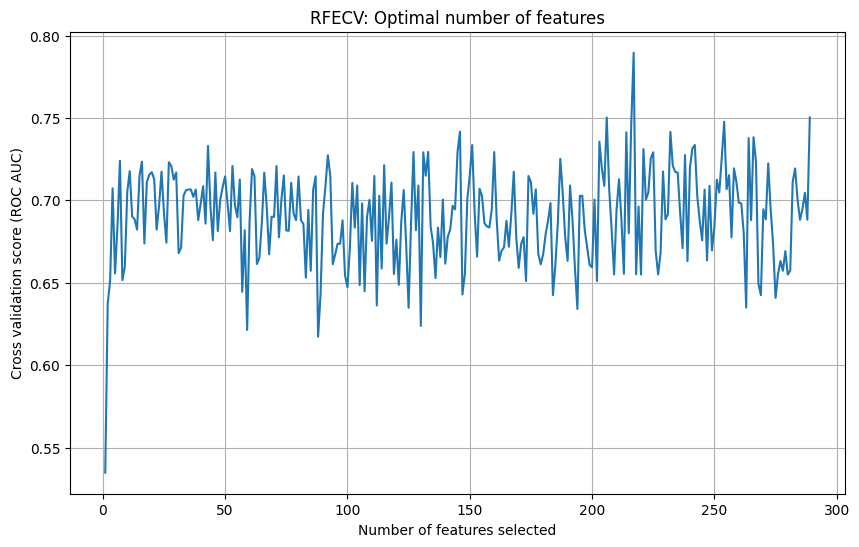


Shape of the DataFrame with RFECV selected features:
(70, 1080)


In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import numpy as np

estimator = RandomForestClassifier(n_estimators=100, random_state=42)

rfecv_selector = RFECV(
    estimator=estimator,
    step=5, # Eliminate 5 feature at each step
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='roc_auc',
    n_jobs=-1
)

print("Starting RFECV... This may take a moment.")
rfecv_selector.fit(features_df_filtered, target_series)
print("RFECV completed.")

optimal_num_features = rfecv_selector.n_features_
print(f"\nOptimal number of features: {optimal_num_features}")

selected_rfecv_features = features_df_filtered.columns[rfecv_selector.support_].tolist()
print("\nSelected features by RFECV:")
print(selected_rfecv_features)

plt.figure(figsize=(10, 6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (ROC AUC)")

plt.plot(range(1, len(rfecv_selector.cv_results_['mean_test_score']) + 1), rfecv_selector.cv_results_['mean_test_score'])
plt.title("RFECV: Optimal number of features")
plt.grid(True)
plt.show()

features_df_rfecv = features_df_filtered[selected_rfecv_features]
print("\nShape of the DataFrame with RFECV selected features:")
print(features_df_rfecv.shape)

## Train and Evaluate Models (Top 20 Features Dataset)

In [ ]:
top20_dataset_models = {}
top20_dataset_metrics = {}

models = {
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gaussian Naive Bayes': GaussianNB(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(random_state=42)
}

for name, model in models.items():
    print(f"\nTraining and evaluating {name} on Top 20 Features...")
    model.fit(X_top20_train, y_top20_train)

    y_pred = model.predict(X_top20_test)

    accuracy = accuracy_score(y_top20_test, y_pred)
    f1 = f1_score(y_top20_test, y_pred, average='weighted')

    classes = model.classes_
    if 'PD' in classes and len(classes) == 2:
        pos_label = 'PD'
        y_prob = model.predict_proba(X_top20_test)[:, list(classes).index(pos_label)]
        roc_auc = roc_auc_score(y_top20_test, y_prob)
    else:
        y_prob = None
        roc_auc = 'N/A'
        print(f"Warning: Could not calculate ROC AUC for {name}. Target classes: {classes}")

    top20_dataset_models[name] = model
    top20_dataset_metrics[name] = {
        'Accuracy': accuracy,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    }

    print(f"{name} - Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}, ROC AUC: {roc_auc:.4f}")

print("\nSummary of Model Performance on Top 20 Features Dataset:")
for name, metrics in top20_dataset_metrics.items():
    print(f"{name}:")
    for metric_name, value in metrics.items():
        if isinstance(value, float):
            print(f"  {metric_name}: {value:.4f}")
        else:
            print(f"  {metric_name}: {value}")


Training and evaluating K-Nearest Neighbors on Top 20 Features...
K-Nearest Neighbors - Accuracy: 0.7857, F1 Score: 0.7868, ROC AUC: 0.8646

Training and evaluating Random Forest on Top 20 Features...
Random Forest - Accuracy: 0.8571, F1 Score: 0.8571, ROC AUC: 0.8229

Training and evaluating Gaussian Naive Bayes on Top 20 Features...
Gaussian Naive Bayes - Accuracy: 0.8571, F1 Score: 0.8571, ROC AUC: 0.8542

Training and evaluating Gradient Boosting Classifier on Top 20 Features...
Gradient Boosting Classifier - Accuracy: 0.7143, F1 Score: 0.7143, ROC AUC: 0.7708

Summary of Model Performance on Top 20 Features Dataset:
K-Nearest Neighbors:
  Accuracy: 0.7857
  F1 Score: 0.7868
  ROC AUC: 0.8646
Random Forest:
  Accuracy: 0.8571
  F1 Score: 0.8571
  ROC AUC: 0.8229
Gaussian Naive Bayes:
  Accuracy: 0.8571
  F1 Score: 0.8571
  ROC AUC: 0.8542
Gradient Boosting Classifier:
  Accuracy: 0.7143
  F1 Score: 0.7143
  ROC AUC: 0.7708


## Summarize Model Performance

In [ ]:
import pandas as pd

all_metrics = []

for model_name, metrics in full_dataset_metrics.items():
    row = {
        'Model': model_name,
        'Dataset': 'Full Dataset',
        'Accuracy': metrics['Accuracy'],
        'F1 Score': metrics['F1 Score'],
        'ROC AUC': metrics['ROC AUC']
    }
    all_metrics.append(row)

for model_name, metrics in top20_dataset_metrics.items():
    row = {
        'Model': model_name,
        'Dataset': 'Top 20 Features',
        'Accuracy': metrics['Accuracy'],
        'F1 Score': metrics['F1 Score'],
        'ROC AUC': metrics['ROC AUC']
    }
    all_metrics.append(row)

metrics_df = pd.DataFrame(all_metrics)

metrics_df_sorted = metrics_df.sort_values(by='ROC AUC', ascending=False)

display(metrics_df_sorted)

,Model,Dataset,Accuracy,F1 Score,ROC AUC
4,K-Nearest Neighbors,Top 20 Features,0.785714,0.786813,0.864583
6,Gaussian Naive Bayes,Top 20 Features,0.857143,0.857143,0.854167
5,Random Forest,Top 20 Features,0.857143,0.857143,0.822917
7,Gradient Boosting Classifier,Top 20 Features,0.714286,0.714286,0.770833
2,Gaussian Naive Bayes,Full Dataset,0.714286,0.701587,0.666667
1,Random Forest,Full Dataset,0.571429,0.571429,0.510417
3,Gradient Boosting Classifier,Full Dataset,0.428571,0.428571,0.500000
0,K-Nearest Neighbors,Full Dataset,0.500000,0.491979,0.343750


## Plot ROC AUC Curves

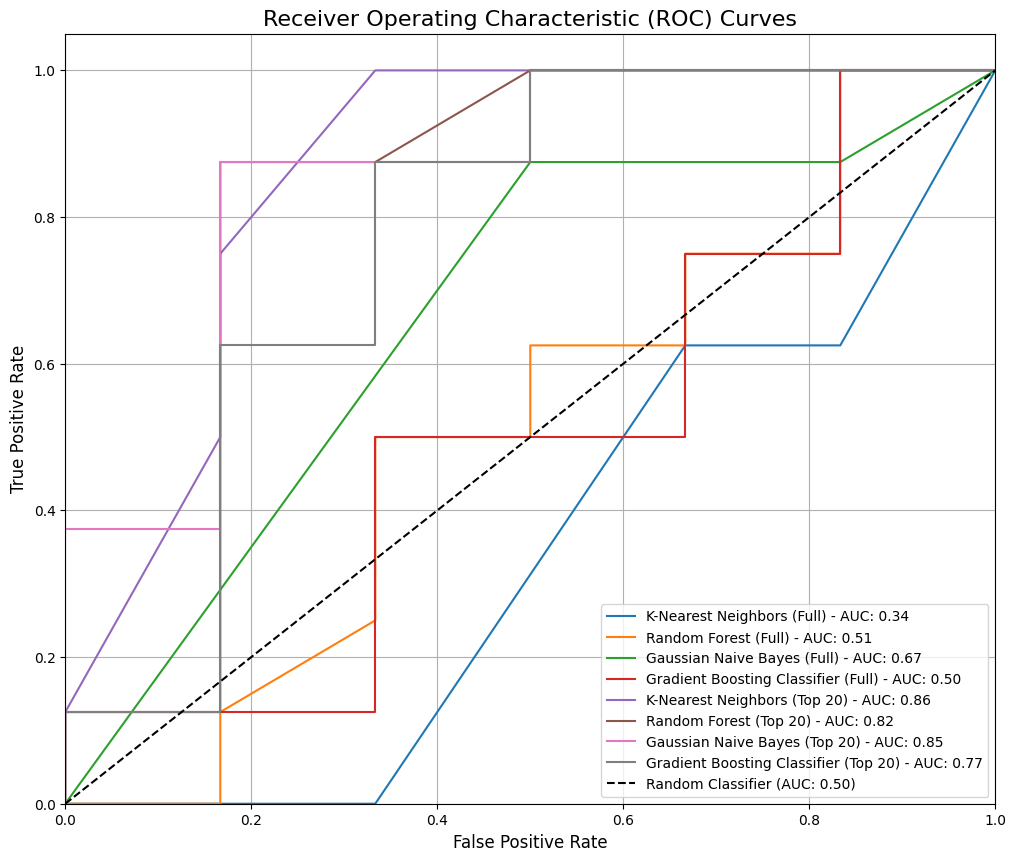

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))

for name, model in full_dataset_models.items():
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_full_test)[:, list(model.classes_).index('PD')]
        fpr, tpr, _ = roc_curve(y_full_test, y_prob, pos_label='PD')
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (Full) - AUC: {roc_auc:.2f}')
    else:
        print(f"Warning: Model {name} does not have predict_proba method for ROC AUC.")

for name, model in top20_dataset_models.items():
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_top20_test)[:, list(model.classes_).index('PD')]
        fpr, tpr, _ = roc_curve(y_top20_test, y_prob, pos_label='PD')
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (Top 20) - AUC: {roc_auc:.2f}')
    else:
        print(f"Warning: Model {name} does not have predict_proba method for ROC AUC.")

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC: 0.50)')

plt.title('Receiver Operating Characteristic (ROC) Curves', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc='lower right', fontsize=10)
plt.grid(True)
plt.show()


## Prepare Datasets for Modeling (RFECV Features)

In [ ]:
from sklearn.model_selection import train_test_split

random_seed = 42

X_rfecv_train, X_rfecv_test, y_rfecv_train, y_rfecv_test = train_test_split(
    features_df_rfecv, target_series, test_size=0.2, random_state=random_seed, stratify=target_series
)

print("Shapes of the RFECV feature set splits:")
print(f"X_rfecv_train shape: {X_rfecv_train.shape}")
print(f"X_rfecv_test shape: {X_rfecv_test.shape}")
print(f"y_rfecv_train shape: {y_rfecv_train.shape}")
print(f"y_rfecv_test shape: {y_rfecv_test.shape}")

Shapes of the RFECV feature set splits:
X_rfecv_train shape: (56, 1080)
X_rfecv_test shape: (14, 1080)
y_rfecv_train shape: (56,)
y_rfecv_test shape: (14,)


## Train and Evaluate Models (RFECV Features Dataset)

In [ ]:
rfecv_dataset_models = {}
rfecv_dataset_metrics = {}

models = {
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gaussian Naive Bayes': GaussianNB(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(random_state=42)
}

for name, model in models.items():
    print(f"\nTraining and evaluating {name} on RFECV Features...")
    model.fit(X_rfecv_train, y_rfecv_train)

    y_pred = model.predict(X_rfecv_test)

    accuracy = accuracy_score(y_rfecv_test, y_pred)
    f1 = f1_score(y_rfecv_test, y_pred, average='weighted')

    classes = model.classes_
    if 'PD' in classes and len(classes) == 2:
        pos_label = 'PD'
        y_prob = model.predict_proba(X_rfecv_test)[:, list(classes).index(pos_label)]
        roc_auc = roc_auc_score(y_rfecv_test, y_prob)
    else:
        y_prob = None
        roc_auc = 'N/A'
        print(f"Warning: Could not calculate ROC AUC for {name}. Target classes: {classes}")

    rfecv_dataset_models[name] = model
    rfecv_dataset_metrics[name] = {
        'Accuracy': accuracy,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    }

    print(f"{name} - Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}, ROC AUC: {roc_auc:.4f}")

print("\nSummary of Model Performance on RFECV Features Dataset:")
for name, metrics in rfecv_dataset_metrics.items():
    print(f"{name}:")
    for metric_name, value in metrics.items():
        if isinstance(value, float):
            print(f"  {metric_name}: {value:.4f}")
        else:
            print(f"  {metric_name}: {value}")


Training and evaluating K-Nearest Neighbors on RFECV Features...
K-Nearest Neighbors - Accuracy: 0.5714, F1 Score: 0.5714, ROC AUC: 0.4792

Training and evaluating Random Forest on RFECV Features...
Random Forest - Accuracy: 0.5714, F1 Score: 0.5714, ROC AUC: 0.6042

Training and evaluating Gaussian Naive Bayes on RFECV Features...
Gaussian Naive Bayes - Accuracy: 0.7143, F1 Score: 0.6714, ROC AUC: 0.6667

Training and evaluating Gradient Boosting Classifier on RFECV Features...
Gradient Boosting Classifier - Accuracy: 0.5000, F1 Score: 0.5026, ROC AUC: 0.4583

Summary of Model Performance on RFECV Features Dataset:
K-Nearest Neighbors:
  Accuracy: 0.5714
  F1 Score: 0.5714
  ROC AUC: 0.4792
Random Forest:
  Accuracy: 0.5714
  F1 Score: 0.5714
  ROC AUC: 0.6042
Gaussian Naive Bayes:
  Accuracy: 0.7143
  F1 Score: 0.6714
  ROC AUC: 0.6667
Gradient Boosting Classifier:
  Accuracy: 0.5000
  F1 Score: 0.5026
  ROC AUC: 0.4583


## Update Model Performance Summary

In [ ]:
import pandas as pd

all_metrics = []

for model_name, metrics in full_dataset_metrics.items():
    row = {
        'Model': model_name,
        'Dataset': 'Full Dataset',
        'Accuracy': metrics['Accuracy'],
        'F1 Score': metrics['F1 Score'],
        'ROC AUC': metrics['ROC AUC']
    }
    all_metrics.append(row)

for model_name, metrics in top20_dataset_metrics.items():
    row = {
        'Model': model_name,
        'Dataset': 'Top 20 Features',
        'Accuracy': metrics['Accuracy'],
        'F1 Score': metrics['F1 Score'],
        'ROC AUC': metrics['ROC AUC']
    }
    all_metrics.append(row)

for model_name, metrics in rfecv_dataset_metrics.items():
    row = {
        'Model': model_name,
        'Dataset': 'RFECV Features',
        'Accuracy': metrics['Accuracy'],
        'F1 Score': metrics['F1 Score'],
        'ROC AUC': metrics['ROC AUC']
    }
    all_metrics.append(row)

metrics_df = pd.DataFrame(all_metrics)

metrics_df_sorted = metrics_df.sort_values(by='ROC AUC', ascending=False)

display(metrics_df_sorted)

,Model,Dataset,Accuracy,F1 Score,ROC AUC
4,K-Nearest Neighbors,Top 20 Features,0.785714,0.786813,0.864583
6,Gaussian Naive Bayes,Top 20 Features,0.857143,0.857143,0.854167
5,Random Forest,Top 20 Features,0.857143,0.857143,0.822917
7,Gradient Boosting Classifier,Top 20 Features,0.714286,0.714286,0.770833
10,Gaussian Naive Bayes,RFECV Features,0.714286,0.671429,0.666667
2,Gaussian Naive Bayes,Full Dataset,0.714286,0.701587,0.666667
9,Random Forest,RFECV Features,0.571429,0.571429,0.604167
1,Random Forest,Full Dataset,0.571429,0.571429,0.510417
3,Gradient Boosting Classifier,Full Dataset,0.428571,0.428571,0.500000
8,K-Nearest Neighbors,RFECV Features,0.571429,0.571429,0.479167


## Update ROC AUC Curves Plot


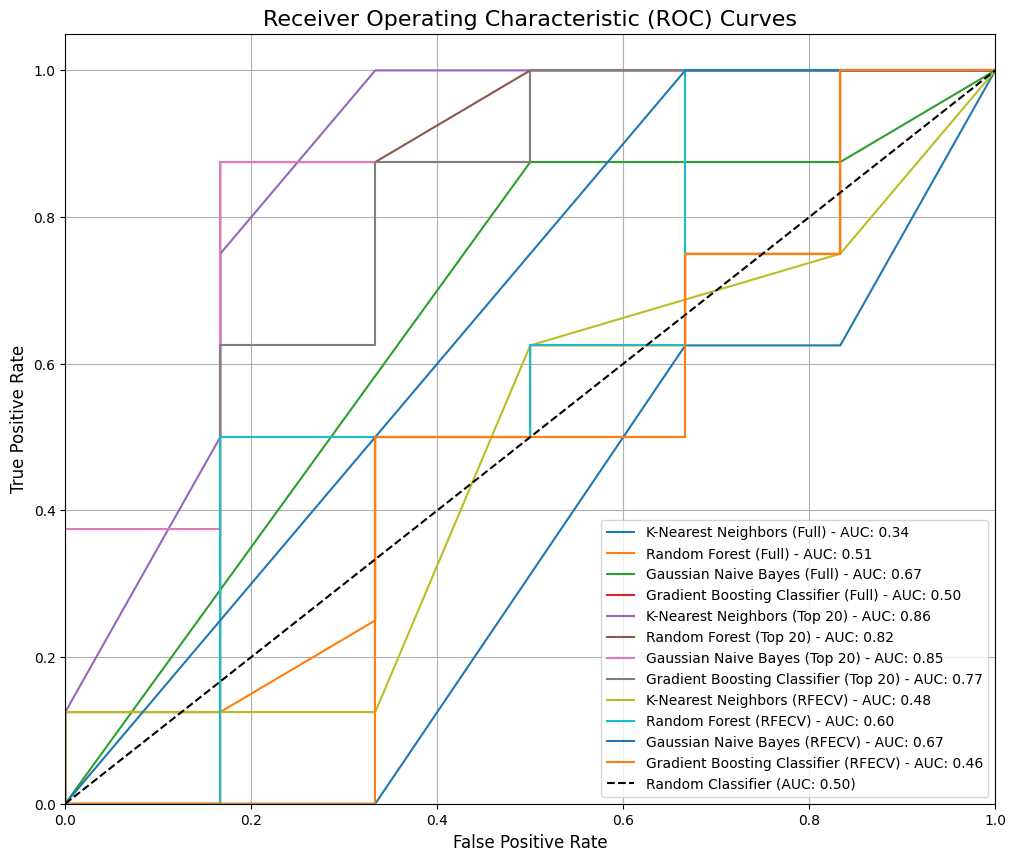

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))

for name, model in full_dataset_models.items():
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_full_test)[:, list(model.classes_).index('PD')]
        fpr, tpr, _ = roc_curve(y_full_test, y_prob, pos_label='PD')
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (Full) - AUC: {roc_auc:.2f}')
    else:
        print(f"Warning: Model {name} does not have predict_proba method for ROC AUC.")

for name, model in top20_dataset_models.items():
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_top20_test)[:, list(model.classes_).index('PD')]
        fpr, tpr, _ = roc_curve(y_top20_test, y_prob, pos_label='PD')
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (Top 20) - AUC: {roc_auc:.2f}')
    else:
        print(f"Warning: Model {name} does not have predict_proba method for ROC AUC.")

for name, model in rfecv_dataset_models.items():
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_rfecv_test)[:, list(model.classes_).index('PD')]
        fpr, tpr, _ = roc_curve(y_rfecv_test, y_prob, pos_label='PD')
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (RFECV) - AUC: {roc_auc:.2f}')
    else:
        print(f"Warning: Model {name} does not have predict_proba method for ROC AUC.")

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC: 0.50)')

plt.title('Receiver Operating Characteristic (ROC) Curves', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc='lower right', fontsize=10)
plt.grid(True)
plt.show()

## Visualization of Top 5 Features: BL vs. V06 Datasets

/tmp/ipython-input-3293704230.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='PPMI_COHORT', y='Feature Value', data=bl_feature_data,
/tmp/ipython-input-3293704230.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='PPMI_COHORT', y='Feature Value', data=bl_feature_data,
/tmp/ipython-input-3293704230.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='PPMI_COHORT', y='Feature Value', data=bl_feature_data,
/tmp/ipython-input-3293704230.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and w

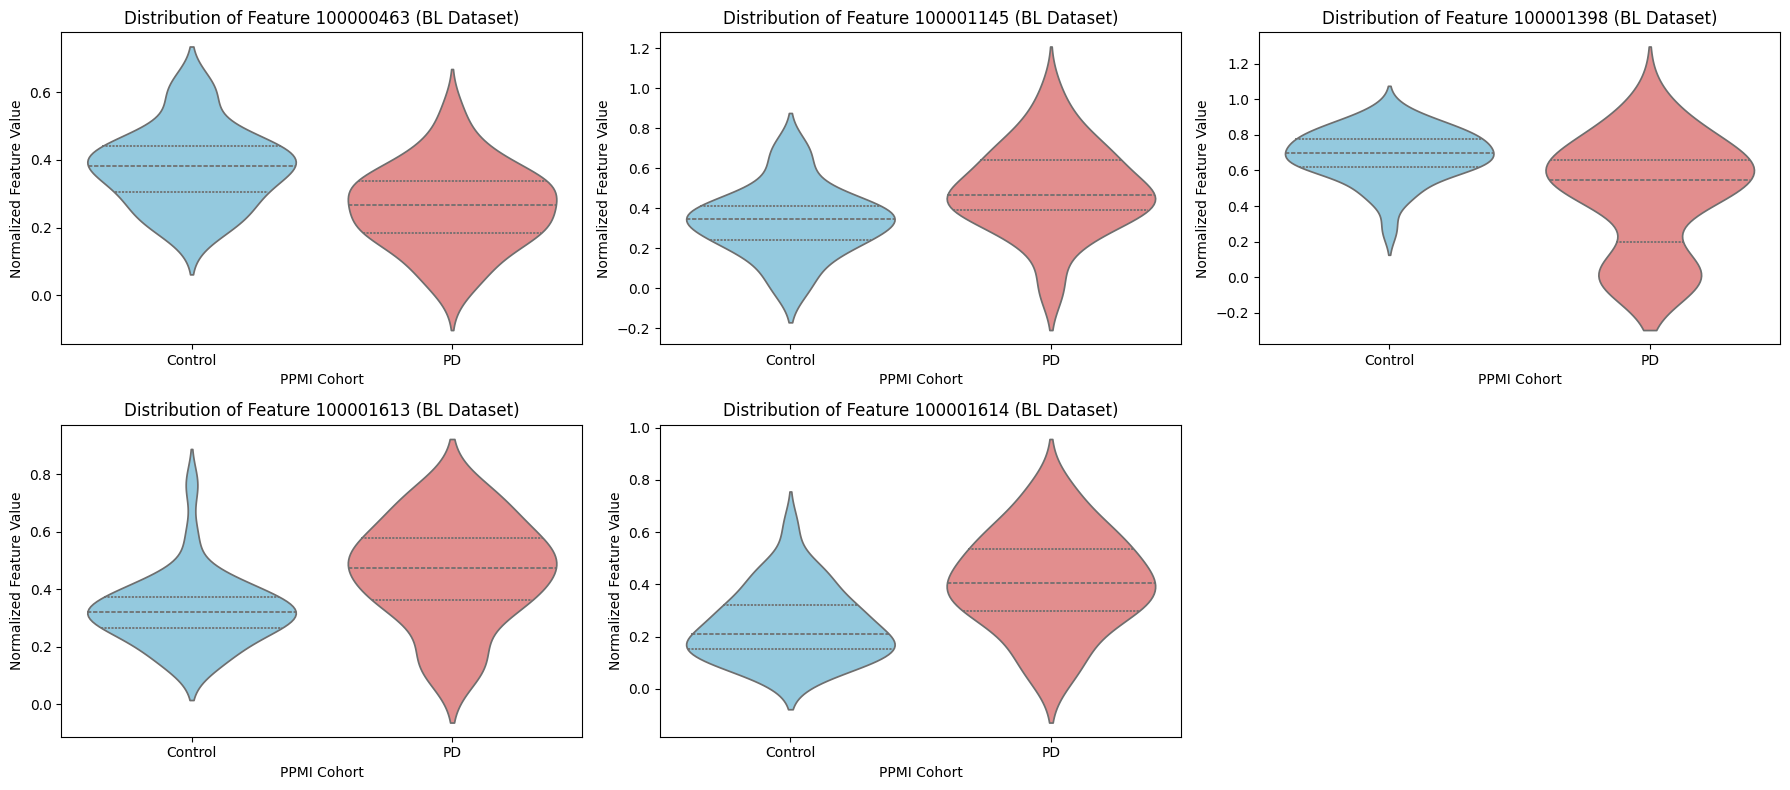

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

top_5_features = top_20_features[:5]

plt.figure(figsize=(18, 8)) # Adjusted figure size for only BL plots

for i, feature_col in enumerate(top_5_features):

    bl_feature_data = pd.DataFrame({
        'Feature Value': features_df_filtered[feature_col],
        'PPMI_COHORT': target_series,
        'Dataset': 'BL'
    })

    plt.subplot(2, 3, i + 1) # Arrange plots in 2 rows, 3 columns
    sns.violinplot(x='PPMI_COHORT', y='Feature Value', data=bl_feature_data,
                   inner='quart', palette={'Control': 'skyblue', 'PD': 'lightcoral'})
    plt.title(f'Distribution of Feature {feature_col} (BL Dataset)')
    plt.xlabel('PPMI Cohort')
    plt.ylabel('Normalized Feature Value')

plt.tight_layout()
plt.show()

## Consolidated Model Performance Across All Datasets

## Prepare V06 Raw Data

In [ ]:
import pandas as pd

log_transformed_df_original = dfs['Log Transformed Data']
sample_meta_df_original = dfs['Sample Meta Data']

sample_meta_subset_v06 = sample_meta_df_original[['PARENT_SAMPLE_NAME', 'PPMI_CLINICAL_EVENT', 'PPMI_COHORT', 'COHORT']]
merged_df_v06 = pd.merge(log_transformed_df_original, sample_meta_subset_v06, on='PARENT_SAMPLE_NAME', how='left')
merged_df_v06 = merged_df_v06[(merged_df_v06['COHORT'] == 'PPMI') & (merged_df_v06['PPMI_CLINICAL_EVENT'] == 'V06')]
display(merged_df_v06.head())

,PARENT_SAMPLE_NAME,35,50,55,62,71,93,98,111,112,...,999926097,999926106,999926107,999926108,999926109,999926111,999926119,PPMI_CLINICAL_EVENT,PPMI_COHORT,COHORT
2,FORD-01866,0.763389,-0.173630,-1.701158,-1.339214,-0.005321,0.316844,-0.441145,-0.127984,1.111707,...,0.025616,-1.124077,-0.875705,-0.431326,0.542659,-0.588468,-0.739856,V06,Control,PPMI
5,FORD-01869,0.732213,-0.784376,0.437342,-0.347726,0.011958,-0.024087,-0.213543,-0.192410,-0.268793,...,0.169102,0.390172,0.289855,-0.000766,-1.170099,2.126070,0.149127,V06,Control,PPMI
6,FORD-01870,-0.255548,-0.168189,0.786087,-0.087078,0.053268,0.062564,-0.185194,-0.158250,0.786463,...,0.004006,-0.797683,-0.833996,-0.188806,0.833188,-0.019476,-0.050041,V06,Control,PPMI
14,FORD-01878,0.089538,0.799475,0.422578,-0.556150,-0.170956,0.105584,-0.169513,-0.039660,0.303230,...,-0.543860,-0.282187,-0.181713,-0.335324,-1.541821,-1.120695,-0.632313,V06,Control,PPMI
15,FORD-01879,1.609548,-0.654173,-0.367013,0.021916,0.178708,-0.011793,0.369177,0.800702,0.588013,...,-0.175607,0.101427,-0.145806,-0.197451,-0.720294,0.935949,0.778187,V06,PD,PPMI


## Preprocess V06 Data (Normalization and Imputation)

In [ ]:
import numpy as np

non_numeric_cols_v06 = ['PARENT_SAMPLE_NAME', 'PPMI_CLINICAL_EVENT', 'PPMI_COHORT', 'COHORT']
numeric_cols_v06 = [col for col in merged_df_v06.columns if col not in non_numeric_cols_v06]

numeric_cols_for_scaling = [col for col in numeric_cols if col in merged_df_v06.columns]

normalized_data_v06 = scaler.transform(merged_df_v06[numeric_cols_for_scaling])

normalized_df_v06 = pd.DataFrame(normalized_data_v06, columns=numeric_cols_for_scaling, index=merged_df_v06.index)

merged_df_v06_preprocessed = pd.concat(
    [merged_df_v06[non_numeric_cols_v06], normalized_df_v06],
    axis=1
)

merged_df_v06_preprocessed_imputed = merged_df_v06_preprocessed.copy()
merged_df_v06_preprocessed_imputed[numeric_cols_for_scaling] = merged_df_v06_preprocessed_imputed[numeric_cols_for_scaling].fillna(median_values)

display(merged_df_v06_preprocessed_imputed.head())

print("\nMissing values after imputation (numeric columns in V06 data):")
print(merged_df_v06_preprocessed_imputed[numeric_cols_for_scaling].isnull().sum().sum())

,PARENT_SAMPLE_NAME,PPMI_CLINICAL_EVENT,PPMI_COHORT,COHORT,35,50,55,62,71,93,...,999925983,999926058,999926062,999926097,999926106,999926107,999926108,999926109,999926111,999926119
2,FORD-01866,V06,Control,PPMI,0.786719,0.511660,0.000000,0.012009,0.475935,0.663647,...,0.249889,0.362328,1.000000,0.244981,0.110494,0.194328,0.186765,0.672302,0.386255,0.230968
5,FORD-01869,V06,Control,PPMI,0.778860,0.294725,0.394278,0.284329,0.481512,0.549924,...,0.167208,0.000000,0.238256,0.283314,0.696986,0.598074,0.355078,0.229009,0.832730,0.522429
6,FORD-01870,V06,Control,PPMI,0.529887,0.513593,0.458577,0.355918,0.494845,0.578827,...,0.143408,0.234496,0.000000,0.239208,0.236911,0.208776,0.281570,0.747496,0.479841,0.457130
14,FORD-01878,V06,Control,PPMI,0.616869,0.857305,0.391556,0.227083,0.422476,0.593178,...,0.202705,0.330046,0.080887,0.092845,0.436571,0.434724,0.224294,0.132800,0.298717,0.266227
15,FORD-01879,V06,PD,PPMI,1.000000,0.340972,0.245978,0.385853,0.535330,0.554025,...,0.105136,0.395878,0.000000,0.191224,0.585151,0.447162,0.278191,0.345426,0.636985,0.728671



Missing values after imputation (numeric columns in V06 data):
0


In [ ]:
import pandas as pd

X_rfecv_v06 = merged_df_v06_preprocessed_imputed[selected_rfecv_features]

y_rfecv_v06 = merged_df_v06_preprocessed_imputed['PPMI_COHORT']

print("Shapes of the RFECV feature set for V06 data:")
print(f"X_rfecv_v06 shape: {X_rfecv_v06.shape}")
print(f"y_rfecv_v06 shape: {y_rfecv_v06.shape}")

display(X_rfecv_v06.head())
display(y_rfecv_v06.head())

Shapes of the RFECV feature set for V06 data:
X_rfecv_v06 shape: (70, 1080)
y_rfecv_v06 shape: (70,)


,35,50,55,62,71,93,98,111,112,117,...,999925983,999926058,999926062,999926097,999926106,999926107,999926108,999926109,999926111,999926119
2,0.786719,0.511660,0.000000,0.012009,0.475935,0.663647,0.375781,0.372611,0.904681,0.168425,...,0.249889,0.362328,1.000000,0.244981,0.110494,0.194328,0.186765,0.672302,0.386255,0.230968
5,0.778860,0.294725,0.394278,0.284329,0.481512,0.549924,0.454042,0.341509,0.441831,0.096701,...,0.167208,0.000000,0.238256,0.283314,0.696986,0.598074,0.355078,0.229009,0.832730,0.522429
6,0.529887,0.513593,0.458577,0.355918,0.494845,0.578827,0.463790,0.358000,0.795634,0.105060,...,0.143408,0.234496,0.000000,0.239208,0.236911,0.208776,0.281570,0.747496,0.479841,0.457130
14,0.616869,0.857305,0.391556,0.227083,0.422476,0.593178,0.469182,0.415251,0.633617,0.084033,...,0.202705,0.330046,0.080887,0.092845,0.436571,0.434724,0.224294,0.132800,0.298717,0.266227
15,1.000000,0.340972,0.245978,0.385853,0.535330,0.554025,0.654410,0.820947,0.729098,0.000000,...,0.105136,0.395878,0.000000,0.191224,0.585151,0.447162,0.278191,0.345426,0.636985,0.728671


,PPMI_COHORT
2,Control
5,Control
6,Control
14,Control
15,PD


In [ ]:
import pandas as pd

best_rfecv_model = rfecv_dataset_models['Gaussian Naive Bayes']

v06_predictions = best_rfecv_model.predict(X_rfecv_v06)

predictions_df_v06 = pd.DataFrame({
    'PARENT_SAMPLE_NAME': merged_df_v06_preprocessed_imputed['PARENT_SAMPLE_NAME'],
    'Actual_PPMI_COHORT': y_rfecv_v06,
    'Predicted_PPMI_COHORT': v06_predictions
})

display(predictions_df_v06.head())

print(f"Predictions made for {len(v06_predictions)} samples in the V06 dataset.")

,PARENT_SAMPLE_NAME,Actual_PPMI_COHORT,Predicted_PPMI_COHORT
2,FORD-01866,Control,Control
5,FORD-01869,Control,Control
6,FORD-01870,Control,PD
14,FORD-01878,Control,Control
15,FORD-01879,PD,PD


Predictions made for 70 samples in the V06 dataset.


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

accuracy_v06 = accuracy_score(y_rfecv_v06, v06_predictions)
f1_v06 = f1_score(y_rfecv_v06, v06_predictions, average='weighted')

classes = best_rfecv_model.classes_
if 'PD' in classes and len(classes) == 2:
    pos_label = 'PD'
    y_prob_v06 = best_rfecv_model.predict_proba(X_rfecv_v06)[:, list(classes).index(pos_label)]
    roc_auc_v06 = roc_auc_score(y_rfecv_v06, y_prob_v06)
else:
    y_prob_v06 = None
    roc_auc_v06 = 'N/A'
    print(f"Warning: Could not calculate ROC AUC for Gaussian Naive Bayes on V06 data. Target classes: {classes}")

print(f"\nEvaluation Metrics for Gaussian Naive Bayes on V06 Data:")
print(f"Accuracy: {accuracy_v06:.4f}")
print(f"F1 Score: {f1_v06:.4f}")
print(f"ROC AUC: {roc_auc_v06:.4f}")


Evaluation Metrics for Gaussian Naive Bayes on V06 Data:
Accuracy: 0.6714
F1 Score: 0.6619
ROC AUC: 0.6768


In [ ]:
import pandas as pd

non_feature_cols_v06_all = ['PARENT_SAMPLE_NAME', 'PPMI_CLINICAL_EVENT', 'PPMI_COHORT', 'COHORT']

X_V06_all_features = merged_df_v06_preprocessed_imputed.drop(columns=non_feature_cols_v06_all)

y_V06 = merged_df_v06_preprocessed_imputed['PPMI_COHORT']

print("Shapes of V06 features and target:")
print(f"X_V06_all_features shape: {X_V06_all_features.shape}")
print(f"y_V06 shape: {y_V06.shape}")

display(X_V06_all_features.head())
display(y_V06.head())

Shapes of V06 features and target:
X_V06_all_features shape: (70, 1496)
y_V06 shape: (70,)


,35,50,55,62,71,93,98,111,112,117,...,999925983,999926058,999926062,999926097,999926106,999926107,999926108,999926109,999926111,999926119
2,0.786719,0.511660,0.000000,0.012009,0.475935,0.663647,0.375781,0.372611,0.904681,0.168425,...,0.249889,0.362328,1.000000,0.244981,0.110494,0.194328,0.186765,0.672302,0.386255,0.230968
5,0.778860,0.294725,0.394278,0.284329,0.481512,0.549924,0.454042,0.341509,0.441831,0.096701,...,0.167208,0.000000,0.238256,0.283314,0.696986,0.598074,0.355078,0.229009,0.832730,0.522429
6,0.529887,0.513593,0.458577,0.355918,0.494845,0.578827,0.463790,0.358000,0.795634,0.105060,...,0.143408,0.234496,0.000000,0.239208,0.236911,0.208776,0.281570,0.747496,0.479841,0.457130
14,0.616869,0.857305,0.391556,0.227083,0.422476,0.593178,0.469182,0.415251,0.633617,0.084033,...,0.202705,0.330046,0.080887,0.092845,0.436571,0.434724,0.224294,0.132800,0.298717,0.266227
15,1.000000,0.340972,0.245978,0.385853,0.535330,0.554025,0.654410,0.820947,0.729098,0.000000,...,0.105136,0.395878,0.000000,0.191224,0.585151,0.447162,0.278191,0.345426,0.636985,0.728671


,PPMI_COHORT
2,Control
5,Control
6,Control
14,Control
15,PD


## Create X_V06 for Top 20 Features

In [ ]:
import pandas as pd

X_V06_top20 = X_V06_all_features[top_20_features]

print("Shape of X_V06_top20:")
print(X_V06_top20.shape)

display(X_V06_top20.head())

Shape of X_V06_top20:
(70, 20)


,100000463,100001145,100001398,100001613,100001614,100001615,100001733,100002070,100003470,100004326,100005996,100019975,100019978,100021100,100021208,100021726,999917612,999921830,999921834,999924549
2,1.000000,0.371148,0.000000,0.164820,0.056867,0.064610,0.128110,0.737846,0.000000,0.386670,0.000000,0.128111,0.000000,0.198969,0.600039,0.491558,0.000000,0.000000,0.000000,0.886898
5,0.471895,0.332747,0.640281,0.222504,0.064321,0.384541,0.407498,0.578424,0.597335,0.411287,0.348476,0.272836,0.245121,0.450947,0.456375,0.384450,0.000000,0.000000,0.374571,0.798727
6,0.392302,0.373407,0.388031,0.250570,0.156366,0.208970,0.034194,0.524337,0.207136,0.615480,0.489272,0.290822,0.497168,0.412361,0.606903,0.479737,0.000000,0.000000,0.583040,0.877757
14,0.274385,0.366834,0.573164,0.273810,0.213677,0.339244,0.192458,0.721715,0.268830,0.937937,0.173640,0.226969,0.243362,0.277394,0.700499,0.000000,0.000000,0.000000,0.418031,0.834977
15,0.646115,0.560246,0.693164,0.396087,0.354862,0.589439,0.400378,0.558817,0.570921,0.267337,0.566132,0.370083,0.601036,0.332500,0.325413,0.339561,0.671229,0.791882,0.313253,0.911695


In [ ]:
import pandas as pd

X_V06_rfecv = X_V06_all_features[selected_rfecv_features]

print("Shape of X_V06_rfecv:")
print(X_V06_rfecv.shape)

display(X_V06_rfecv.head())

Shape of X_V06_rfecv:
(70, 1080)


,35,50,55,62,71,93,98,111,112,117,...,999925983,999926058,999926062,999926097,999926106,999926107,999926108,999926109,999926111,999926119
2,0.786719,0.511660,0.000000,0.012009,0.475935,0.663647,0.375781,0.372611,0.904681,0.168425,...,0.249889,0.362328,1.000000,0.244981,0.110494,0.194328,0.186765,0.672302,0.386255,0.230968
5,0.778860,0.294725,0.394278,0.284329,0.481512,0.549924,0.454042,0.341509,0.441831,0.096701,...,0.167208,0.000000,0.238256,0.283314,0.696986,0.598074,0.355078,0.229009,0.832730,0.522429
6,0.529887,0.513593,0.458577,0.355918,0.494845,0.578827,0.463790,0.358000,0.795634,0.105060,...,0.143408,0.234496,0.000000,0.239208,0.236911,0.208776,0.281570,0.747496,0.479841,0.457130
14,0.616869,0.857305,0.391556,0.227083,0.422476,0.593178,0.469182,0.415251,0.633617,0.084033,...,0.202705,0.330046,0.080887,0.092845,0.436571,0.434724,0.224294,0.132800,0.298717,0.266227
15,1.000000,0.340972,0.245978,0.385853,0.535330,0.554025,0.654410,0.820947,0.729098,0.000000,...,0.105136,0.395878,0.000000,0.191224,0.585151,0.447162,0.278191,0.345426,0.636985,0.728671


## Evaluate Top 3 Models on X_V06_top20

### Subtask:
Evaluate the K-Nearest Neighbors, Gaussian Naive Bayes, and Random Forest models (all trained on `top_20_features`) using `X_V06_top20` and `y_V06`. Calculate and store their Accuracy, F1 Score, and ROC AUC.


In [ ]:
v06_top20_metrics = {}

models_to_evaluate = ['K-Nearest Neighbors', 'Random Forest', 'Gaussian Naive Bayes']

for name in models_to_evaluate:
    model = top20_dataset_models[name]
    print(f"\nEvaluating {name} on V06 Top 20 Features...")

    y_pred_v06 = model.predict(X_V06_top20)

    accuracy_v06 = accuracy_score(y_V06, y_pred_v06)
    f1_v06 = f1_score(y_V06, y_pred_v06, average='weighted')

    classes = model.classes_
    if 'PD' in classes and len(classes) == 2:
        pos_label = 'PD'
        y_prob_v06 = model.predict_proba(X_V06_top20)[:, list(classes).index(pos_label)]
        roc_auc_v06 = roc_auc_score(y_V06, y_prob_v06)
    else:
        y_prob_v06 = None
        roc_auc_v06 = 'N/A'
        print(f"Warning: Could not calculate ROC AUC for {name} on V06 data. Target classes: {classes}")

    v06_top20_metrics[name] = {
        'Accuracy': accuracy_v06,
        'F1 Score': f1_v06,
        'ROC AUC': roc_auc_v06
    }

    print(f"{name} - Accuracy: {accuracy_v06:.4f}, F1 Score: {f1_v06:.4f}, ROC AUC: {roc_auc_v06:.4f}")

print("\nSummary of Model Performance on V06 Data with Top 20 Features:")
for name, metrics in v06_top20_metrics.items():
    print(f"{name}:")
    for metric_name, value in metrics.items():
        if isinstance(value, float):
            print(f"  {metric_name}: {value:.4f}")
        else:
            print(f"  {metric_name}: {value}")


Evaluating K-Nearest Neighbors on V06 Top 20 Features...
K-Nearest Neighbors - Accuracy: 0.7143, F1 Score: 0.7133, ROC AUC: 0.8109

Evaluating Random Forest on V06 Top 20 Features...
Random Forest - Accuracy: 0.7429, F1 Score: 0.7407, ROC AUC: 0.7821

Evaluating Gaussian Naive Bayes on V06 Top 20 Features...
Gaussian Naive Bayes - Accuracy: 0.6857, F1 Score: 0.6857, ROC AUC: 0.7640

Summary of Model Performance on V06 Data with Top 20 Features:
K-Nearest Neighbors:
  Accuracy: 0.7143
  F1 Score: 0.7133
  ROC AUC: 0.8109
Random Forest:
  Accuracy: 0.7429
  F1 Score: 0.7407
  ROC AUC: 0.7821
Gaussian Naive Bayes:
  Accuracy: 0.6857
  F1 Score: 0.6857
  ROC AUC: 0.7640


## Confusion Matrix for the Best Model on V06 Dataset

In [ ]:
from sklearn.metrics import confusion_matrix

best_model_name = 'K-Nearest Neighbors'
best_model_v06 = top20_dataset_models[best_model_name]

y_pred_best_v06 = best_model_v06.predict(X_V06_top20)

cm = confusion_matrix(y_V06, y_pred_best_v06, labels=['Control', 'PD'])

TN, FP, FN, TP = cm.ravel()

print(f"Confusion Matrix for K-Nearest Neighbors (Top 20 Features) on V06 Dataset:\n{cm}")
print(f"\nTrue Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")

Confusion Matrix for K-Nearest Neighbors (Top 20 Features) on V06 Dataset:
[[21 11]
 [ 9 29]]

True Positives (TP): 29
True Negatives (TN): 21
False Positives (FP): 11
False Negatives (FN): 9


## Evaluate Best GBC Model on X_V06_rfecv



In [ ]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

v06_rfecv_metrics = {}

gbc_model_rfecv = rfecv_dataset_models['Gradient Boosting Classifier']

print(f"\nEvaluating Gradient Boosting Classifier on V06 RFECV Features...")

y_pred_v06_gbc = gbc_model_rfecv.predict(X_V06_rfecv)

accuracy_v06_gbc = accuracy_score(y_V06, y_pred_v06_gbc)

f1_v06_gbc = f1_score(y_V06, y_pred_v06_gbc, average='weighted')

classes = gbc_model_rfecv.classes_
if 'PD' in classes and len(classes) == 2:
    pos_label = 'PD'
    y_prob_v06_gbc = gbc_model_rfecv.predict_proba(X_V06_rfecv)[:, list(classes).index(pos_label)]

    roc_auc_v06_gbc = roc_auc_score(y_V06, y_prob_v06_gbc)
else:
    y_prob_v06_gbc = None
    roc_auc_v06_gbc = 'N/A'
    print(f"Warning: Could not calculate ROC AUC for Gradient Boosting Classifier on V06 data. Target classes: {classes}")

v06_rfecv_metrics['Gradient Boosting Classifier'] = {
    'Accuracy': accuracy_v06_gbc,
    'F1 Score': f1_v06_gbc,
    'ROC AUC': roc_auc_v06_gbc
}

print(f"Gradient Boosting Classifier - Accuracy: {accuracy_v06_gbc:.4f}, F1 Score: {f1_v06_gbc:.4f}, ROC AUC: {roc_auc_v06_gbc:.4f}")

print("\nSummary of Model Performance on V06 Data with RFECV Features:")
for name, metrics in v06_rfecv_metrics.items():
    print(f"{name}:")
    for metric_name, value in metrics.items():
        if isinstance(value, float):
            print(f"  {metric_name}: {value:.4f}")
        else:
            print(f"  {metric_name}: {value}")


Evaluating Gradient Boosting Classifier on V06 RFECV Features...
Gradient Boosting Classifier - Accuracy: 0.5286, F1 Score: 0.5231, ROC AUC: 0.5966

Summary of Model Performance on V06 Data with RFECV Features:
Gradient Boosting Classifier:
  Accuracy: 0.5286
  F1 Score: 0.5231
  ROC AUC: 0.5966


## Summarize V06 Model Performance



In [ ]:
import pandas as pd

all_v06_metrics = []

for model_name, metrics in v06_top20_metrics.items():
    row = {
        'Model Name': model_name,
        'Feature Set': 'Top 20 Features (V06)',
        'Accuracy': metrics['Accuracy'],
        'F1 Score': metrics['F1 Score'],
        'ROC AUC': metrics['ROC AUC']
    }
    all_v06_metrics.append(row)

for model_name, metrics in v06_rfecv_metrics.items():
    row = {
        'Model Name': model_name,
        'Feature Set': 'RFECV Features (V06)',
        'Accuracy': metrics['Accuracy'],
        'F1 Score': metrics['F1 Score'],
        'ROC AUC': metrics['ROC AUC']
    }
    all_v06_metrics.append(row)

v06_metrics_df = pd.DataFrame(all_v06_metrics)

v06_metrics_df_sorted = v06_metrics_df.sort_values(by='ROC AUC', ascending=False)

display(v06_metrics_df_sorted)

,Model Name,Feature Set,Accuracy,F1 Score,ROC AUC
0,K-Nearest Neighbors,Top 20 Features (V06),0.714286,0.713340,0.810855
1,Random Forest,Top 20 Features (V06),0.742857,0.740714,0.782072
2,Gaussian Naive Bayes,Top 20 Features (V06),0.685714,0.685714,0.763980
3,Gradient Boosting Classifier,RFECV Features (V06),0.528571,0.523146,0.596628


In [ ]:
import pandas as pd
print("Model Performance on Original Datasets (Full, Top 20, RFECV Features):")
display(metrics_df_sorted)

print("\nModel Performance on V06 Datasets (Top 20, RFECV Features):")
display(v06_metrics_df_sorted)

Model Performance on Original Datasets (Full, Top 20, RFECV Features):


,Model,Dataset,Accuracy,F1 Score,ROC AUC
4,K-Nearest Neighbors,Top 20 Features,0.785714,0.786813,0.864583
6,Gaussian Naive Bayes,Top 20 Features,0.857143,0.857143,0.854167
5,Random Forest,Top 20 Features,0.857143,0.857143,0.822917
7,Gradient Boosting Classifier,Top 20 Features,0.714286,0.714286,0.770833
10,Gaussian Naive Bayes,RFECV Features,0.714286,0.671429,0.666667
2,Gaussian Naive Bayes,Full Dataset,0.714286,0.701587,0.666667
9,Random Forest,RFECV Features,0.571429,0.571429,0.604167
1,Random Forest,Full Dataset,0.571429,0.571429,0.510417
3,Gradient Boosting Classifier,Full Dataset,0.428571,0.428571,0.500000
8,K-Nearest Neighbors,RFECV Features,0.571429,0.571429,0.479167



Model Performance on V06 Datasets (Top 20, RFECV Features):


,Model Name,Feature Set,Accuracy,F1 Score,ROC AUC
0,K-Nearest Neighbors,Top 20 Features (V06),0.714286,0.713340,0.810855
1,Random Forest,Top 20 Features (V06),0.742857,0.740714,0.782072
2,Gaussian Naive Bayes,Top 20 Features (V06),0.685714,0.685714,0.763980
3,Gradient Boosting Classifier,RFECV Features (V06),0.528571,0.523146,0.596628


In [ ]:
import pandas as pd

rf_model_top20 = top20_dataset_models['Random Forest']

feature_importances = rf_model_top20.feature_importances_

feature_importances_df = pd.DataFrame({
    'Feature': top_20_features,
    'Importance': feature_importances
})

feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

display(feature_importances_df.head(10))
print(f"Total number of features: {len(feature_importances_df)}")

,Feature,Importance
3,100001613,0.105171
7,100002070,0.097495
9,100004326,0.069388
0,100000463,0.063573
16,999917612,0.063475
10,100005996,0.055096
2,100001398,0.053257
1,100001145,0.052547
4,100001614,0.047070
13,100021100,0.045055


Total number of features: 20


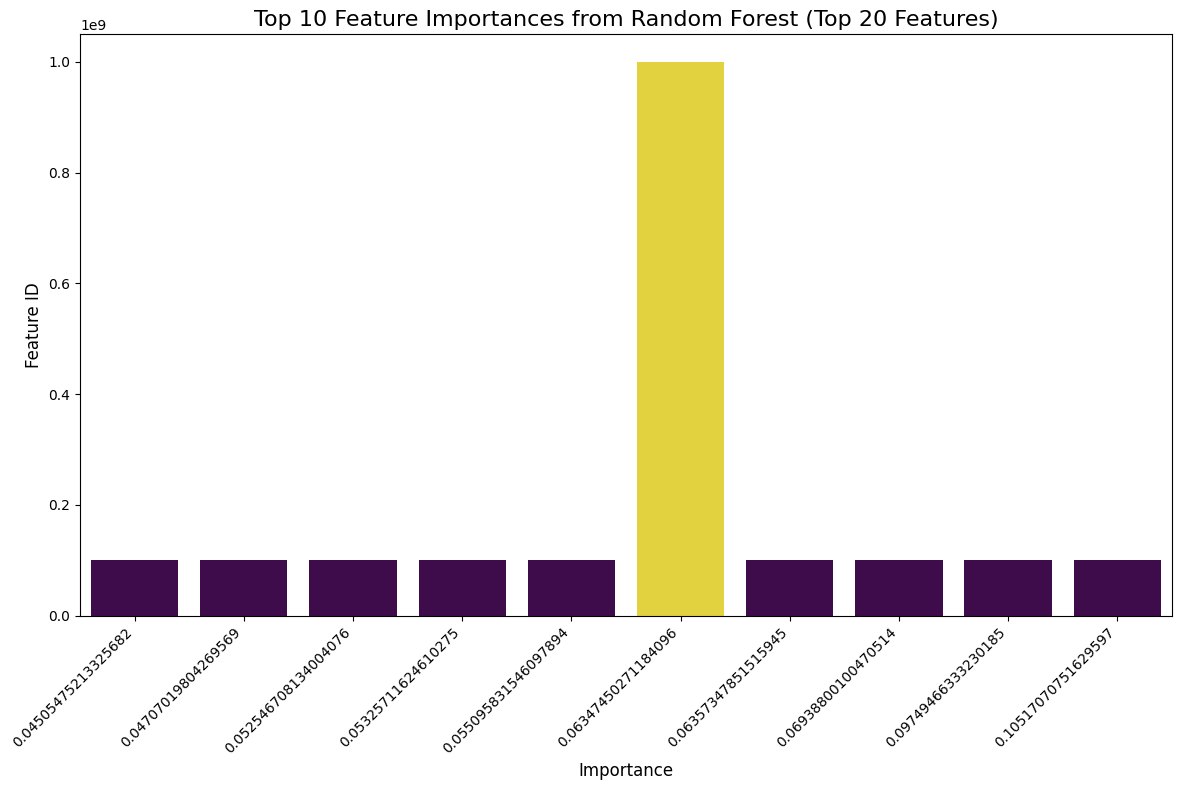

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df.head(10), palette='viridis', hue='Feature', legend=False)
plt.title('Top 10 Feature Importances from Random Forest (Top 20 Features)', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature ID', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate y-axis labels diagonally
plt.tight_layout()
plt.show()

In [ ]:
chemical_annotation_df = dfs['Chemical Annotation']

feature_info = chemical_annotation_df[chemical_annotation_df['CHEM_ID'] == 100001613]

display(feature_info[['CHEM_ID', 'SUPER_PATHWAY', 'SUB_PATHWAY', 'HMDB']])

,CHEM_ID,SUPER_PATHWAY,SUB_PATHWAY,HMDB
445,100001613,Lipid,"Fatty Acid, Dicarboxylate",HMDB0000872


In [ ]:
import pandas as pd

most_important_feature_id = 100001613

bl_feature_data_plot = pd.DataFrame({
    'Feature Value': merged_df_filtered[most_important_feature_id],
    'PPMI_COHORT': merged_df_filtered['PPMI_COHORT']
})

display(bl_feature_data_plot.head())

,Feature Value,PPMI_COHORT
3,0.269264,Control
4,0.598288,PD
8,0.764095,Control
21,0.319265,Control
22,0.339817,PD


**Reasoning**:
To visualize the distribution of the most important feature across 'PD' and 'Control' cohorts in the BL dataset, I will create a violin plot using the `bl_feature_data_plot` DataFrame.



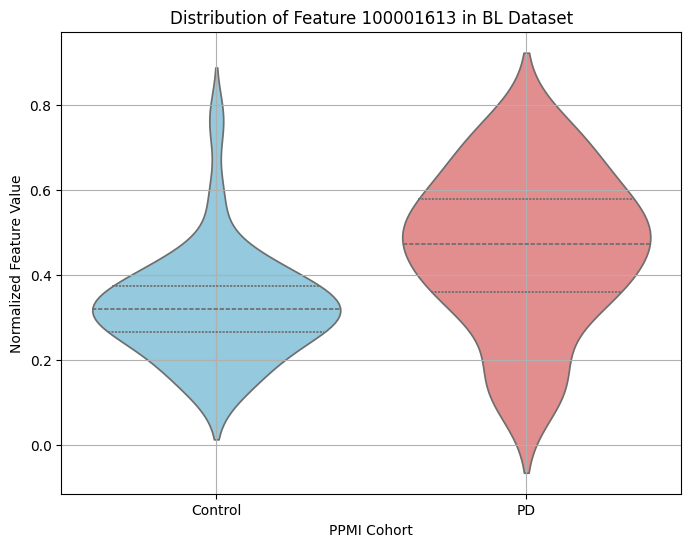

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.violinplot(x='PPMI_COHORT', y='Feature Value', data=bl_feature_data_plot,
               inner='quart', palette={'Control': 'skyblue', 'PD': 'lightcoral'}, hue='PPMI_COHORT', legend=False)
plt.title(f'Distribution of Feature {most_important_feature_id} in BL Dataset')
plt.xlabel('PPMI Cohort')
plt.ylabel('Normalized Feature Value')
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd

most_important_feature_id = 100001613

v06_feature_data_plot = pd.DataFrame({
    'Feature Value': merged_df_v06_preprocessed_imputed[most_important_feature_id],
    'PPMI_COHORT': merged_df_v06_preprocessed_imputed['PPMI_COHORT']
})

display(v06_feature_data_plot.head())

,Feature Value,PPMI_COHORT
2,0.164820,Control
5,0.222504,Control
6,0.250570,Control
14,0.273810,Control
15,0.396087,PD


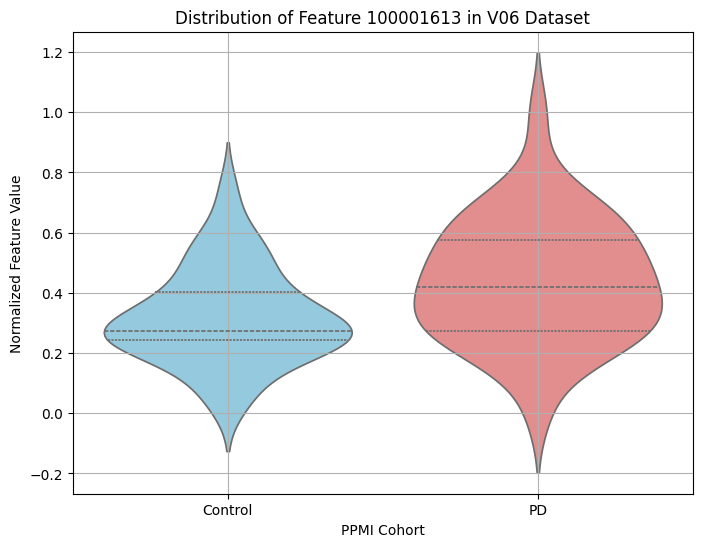

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.violinplot(x='PPMI_COHORT', y='Feature Value', data=v06_feature_data_plot,
               inner='quart', palette={'Control': 'skyblue', 'PD': 'lightcoral'}, hue='PPMI_COHORT', legend=False)
plt.title(f'Distribution of Feature {most_important_feature_id} in V06 Dataset')
plt.xlabel('PPMI Cohort')
plt.ylabel('Normalized Feature Value')
plt.grid(True)
plt.show()

In [ ]:
top_5_features = [100001613, 100002070, 100004326, 100000463, 999917612]

features_df_top5 = features_df_filtered[top_5_features]

print("Shape of features_df_top5:")
print(features_df_top5.shape)
display(features_df_top5.head())

Shape of features_df_top5:
(70, 5)


,100001613,100002070,100004326,100000463,999917612
3,0.269264,0.508326,0.126419,0.620555,0.000000
4,0.598288,0.495473,0.508521,0.220416,0.488605
8,0.764095,0.575504,0.550525,0.213870,0.000000
21,0.319265,0.566376,0.000000,0.360723,0.596148
22,0.339817,0.589549,0.191081,0.053185,0.650355


In [ ]:
from sklearn.model_selection import train_test_split

random_seed = 42

X_top5_train, X_top5_test, y_top5_train, y_top5_test = train_test_split(
    features_df_top5, target_series, test_size=0.2, random_state=random_seed, stratify=target_series
)

print("\nShapes of the top 5 feature set splits:")
print(f"X_top5_train shape: {X_top5_train.shape}")
print(f"X_top5_test shape: {X_top5_test.shape}")
print(f"y_top5_train shape: {y_top5_train.shape}")
print(f"y_top5_test shape: {y_top5_test.shape}")


Shapes of the top 5 feature set splits:
X_top5_train shape: (56, 5)
X_top5_test shape: (14, 5)
y_top5_train shape: (56,)
y_top5_test shape: (14,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

top5_dataset_models = {}
top5_dataset_metrics = {}

models = {
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gaussian Naive Bayes': GaussianNB(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(random_state=42)
}

for name, model in models.items():
    print(f"\nTraining and evaluating {name} on Top 5 Features...")
    model.fit(X_top5_train, y_top5_train)

    y_pred = model.predict(X_top5_test)

    accuracy = accuracy_score(y_top5_test, y_pred)
    f1 = f1_score(y_top5_test, y_pred, average='weighted')

    classes = model.classes_
    if 'PD' in classes and len(classes) == 2:
        pos_label = 'PD'
        y_prob = model.predict_proba(X_top5_test)[:, list(classes).index(pos_label)]
        roc_auc = roc_auc_score(y_top5_test, y_prob)
    else:
        y_prob = None
        roc_auc = 'N/A'
        print(f"Warning: Could not calculate ROC AUC for {name}. Target classes: {classes}")

    top5_dataset_models[name] = model
    top5_dataset_metrics[name] = {
        'Accuracy': accuracy,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    }

    print(f"{name} - Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}, ROC AUC: {roc_auc:.4f}")

print("\nSummary of Model Performance on Top 5 Features Dataset:")
for name, metrics in top5_dataset_metrics.items():
    print(f"{name}:")
    for metric_name, value in metrics.items():
        if isinstance(value, float):
            print(f"  {metric_name}: {value:.4f}")
        else:
            print(f"  {metric_name}: {value}")


Training and evaluating K-Nearest Neighbors on Top 5 Features...
K-Nearest Neighbors - Accuracy: 0.5714, F1 Score: 0.5714, ROC AUC: 0.6979

Training and evaluating Random Forest on Top 5 Features...
Random Forest - Accuracy: 0.6429, F1 Score: 0.6447, ROC AUC: 0.6458

Training and evaluating Gaussian Naive Bayes on Top 5 Features...
Gaussian Naive Bayes - Accuracy: 0.6429, F1 Score: 0.6447, ROC AUC: 0.6667

Training and evaluating Gradient Boosting Classifier on Top 5 Features...
Gradient Boosting Classifier - Accuracy: 0.5714, F1 Score: 0.5714, ROC AUC: 0.5833

Summary of Model Performance on Top 5 Features Dataset:
K-Nearest Neighbors:
  Accuracy: 0.5714
  F1 Score: 0.5714
  ROC AUC: 0.6979
Random Forest:
  Accuracy: 0.6429
  F1 Score: 0.6447
  ROC AUC: 0.6458
Gaussian Naive Bayes:
  Accuracy: 0.6429
  F1 Score: 0.6447
  ROC AUC: 0.6667
Gradient Boosting Classifier:
  Accuracy: 0.5714
  F1 Score: 0.5714
  ROC AUC: 0.5833


In [ ]:
import pandas as pd

all_metrics = []

for model_name, metrics in full_dataset_metrics.items():
    row = {
        'Model': model_name,
        'Dataset': 'Full Dataset',
        'Accuracy': metrics['Accuracy'],
        'F1 Score': metrics['F1 Score'],
        'ROC AUC': metrics['ROC AUC']
    }
    all_metrics.append(row)

for model_name, metrics in top20_dataset_metrics.items():
    row = {
        'Model': model_name,
        'Dataset': 'Top 20 Features',
        'Accuracy': metrics['Accuracy'],
        'F1 Score': metrics['F1 Score'],
        'ROC AUC': metrics['ROC AUC']
    }
    all_metrics.append(row)

for model_name, metrics in rfecv_dataset_metrics.items():
    row = {
        'Model': model_name,
        'Dataset': 'RFECV Features',
        'Accuracy': metrics['Accuracy'],
        'F1 Score': metrics['F1 Score'],
        'ROC AUC': metrics['ROC AUC']
    }
    all_metrics.append(row)

# Add the new top 5 features metrics
for model_name, metrics in top5_dataset_metrics.items():
    row = {
        'Model': model_name,
        'Dataset': 'Top 5 Features',
        'Accuracy': metrics['Accuracy'],
        'F1 Score': metrics['F1 Score'],
        'ROC AUC': metrics['ROC AUC']
    }
    all_metrics.append(row)

metrics_df = pd.DataFrame(all_metrics)

metrics_df_sorted = metrics_df.sort_values(by='ROC AUC', ascending=False)

display(metrics_df_sorted)


,Model,Dataset,Accuracy,F1 Score,ROC AUC
4,K-Nearest Neighbors,Top 20 Features,0.785714,0.786813,0.864583
6,Gaussian Naive Bayes,Top 20 Features,0.857143,0.857143,0.854167
5,Random Forest,Top 20 Features,0.857143,0.857143,0.822917
7,Gradient Boosting Classifier,Top 20 Features,0.714286,0.714286,0.770833
12,K-Nearest Neighbors,Top 5 Features,0.571429,0.571429,0.697917
2,Gaussian Naive Bayes,Full Dataset,0.714286,0.701587,0.666667
10,Gaussian Naive Bayes,RFECV Features,0.714286,0.671429,0.666667
14,Gaussian Naive Bayes,Top 5 Features,0.642857,0.644689,0.666667
13,Random Forest,Top 5 Features,0.642857,0.644689,0.645833
9,Random Forest,RFECV Features,0.571429,0.571429,0.604167


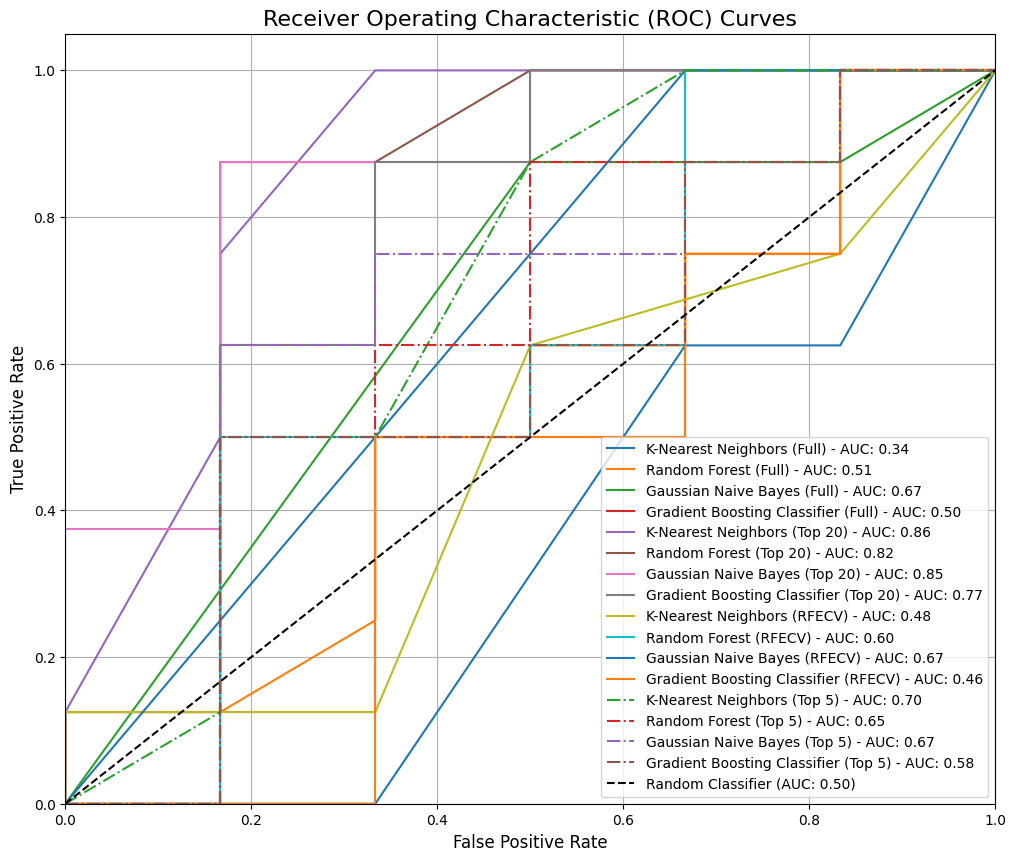

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))

for name, model in full_dataset_models.items():
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_full_test)[:, list(model.classes_).index('PD')]
        fpr, tpr, _ = roc_curve(y_full_test, y_prob, pos_label='PD')
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (Full) - AUC: {roc_auc:.2f}')
    else:
        print(f"Warning: Model {name} does not have predict_proba method for ROC AUC.")

for name, model in top20_dataset_models.items():
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_top20_test)[:, list(model.classes_).index('PD')]
        fpr, tpr, _ = roc_curve(y_top20_test, y_prob, pos_label='PD')
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (Top 20) - AUC: {roc_auc:.2f}')
    else:
        print(f"Warning: Model {name} does not have predict_proba method for ROC AUC.")

for name, model in rfecv_dataset_models.items():
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_rfecv_test)[:, list(model.classes_).index('PD')]
        fpr, tpr, _ = roc_curve(y_rfecv_test, y_prob, pos_label='PD')
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (RFECV) - AUC: {roc_auc:.2f}')
    else:
        print(f"Warning: Model {name} does not have predict_proba method for ROC AUC.")

for name, model in top5_dataset_models.items():
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_top5_test)[:, list(model.classes_).index('PD')]
        fpr, tpr, _ = roc_curve(y_top5_test, y_prob, pos_label='PD')
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (Top 5) - AUC: {roc_auc:.2f}', linestyle='-.')
    else:
        print(f"Warning: Model {name} does not have predict_proba method for ROC AUC.")

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC: 0.50)')

plt.title('Receiver Operating Characteristic (ROC) Curves', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc='lower right', fontsize=10)
plt.grid(True)
plt.show()